In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows',None)

In [2]:
movies = pd.read_csv('my_movies (1).csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movies1 = movies.drop(columns=['V1','V2','V3','V4','V5'])
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
movies1.shape

(10, 10)

In [5]:
movies1.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Dell\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


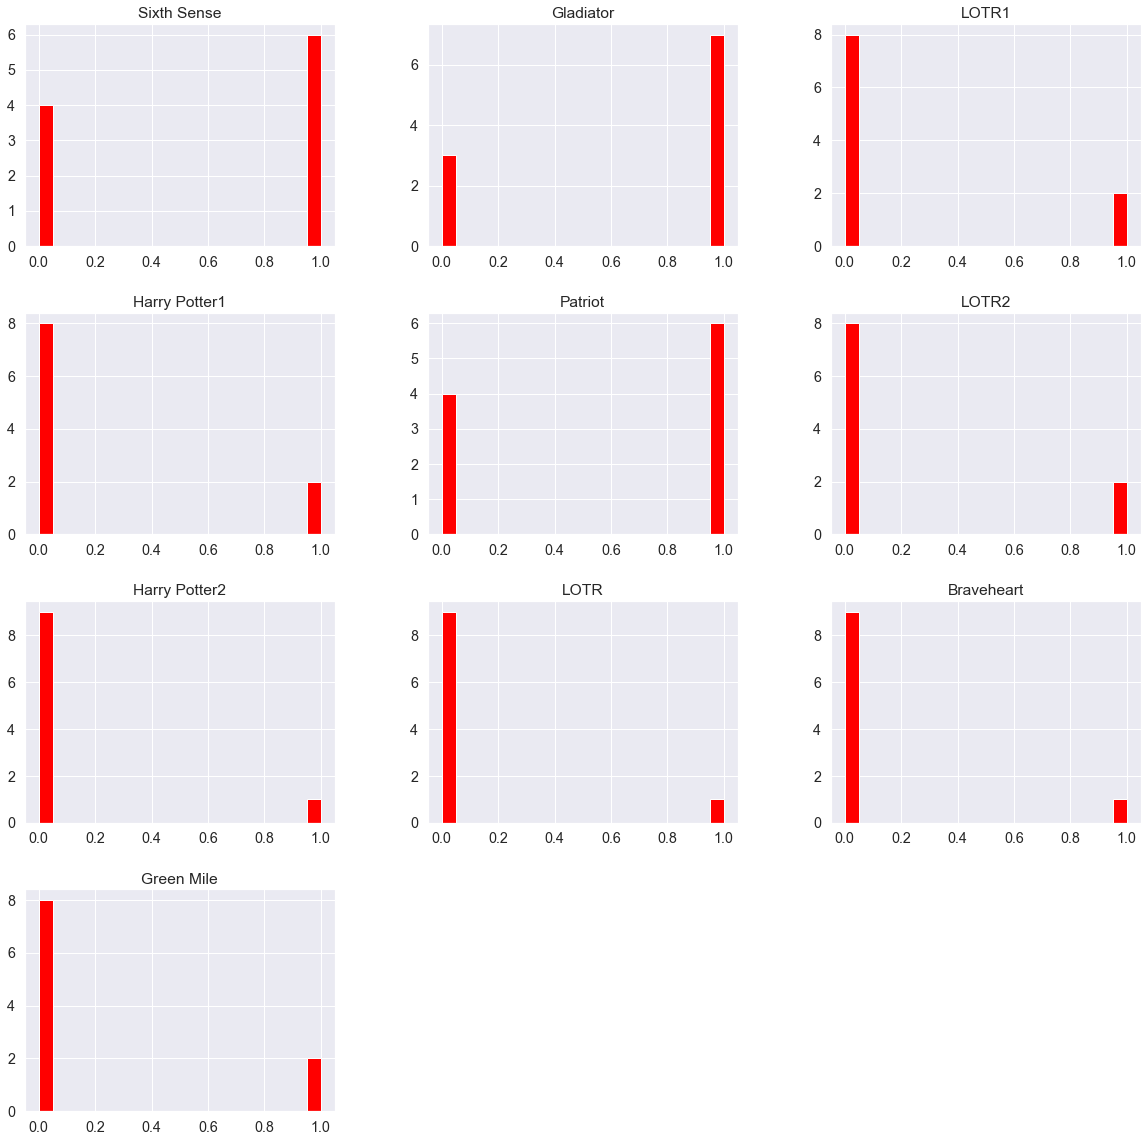

In [6]:
##Check count of 0 and 1 each column from dataframe
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=movies1.hist(bins=20,color='red' )

Most of the column count is 0

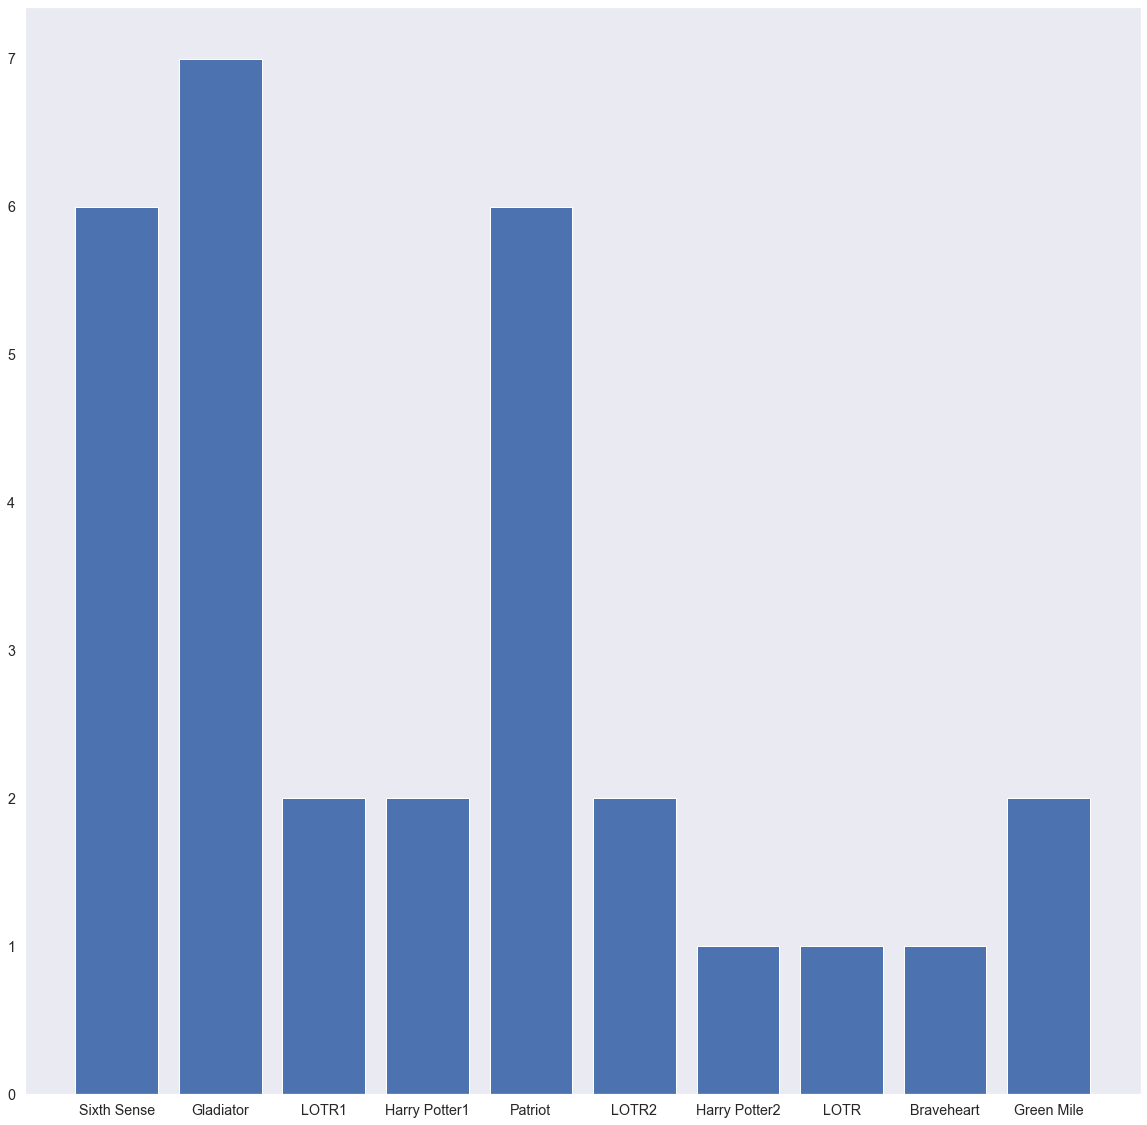

In [13]:
# ploting barplot for all columns in dataframe using for loop
movie_count = []
col_names = movies1.columns

for name in col_names:
    movie_count.append(movies1[name].value_counts()[1])
plt.bar(col_names,movie_count)
plt.show();

sixth sense,Gladiator and Patriot has high count

 ### Aprior Algorithm
 at min_support 0.15

In [45]:
frequent_itemset = apriori(movies1, min_support = 0.1,use_colnames=True)
frequent_itemset

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [49]:
rules = association_rules(frequent_itemset ,metric = 'confidence',min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


with confidence of 80% we got 127 association combinations of books

In [50]:
rules['consequents'].value_counts()

(Sixth Sense)                           16
(Green Mile)                            14
(LOTR1)                                 11
(LOTR2)                                 11
(Harry Potter1)                         10
(Gladiator)                              9
(Sixth Sense, Green Mile)                5
(Patriot)                                4
(LOTR2, Green Mile)                      4
(Green Mile, LOTR1)                      4
(Sixth Sense, LOTR2)                     4
(Sixth Sense, LOTR1)                     4
(Sixth Sense, Harry Potter1)             3
(Green Mile, Harry Potter1)              3
(LOTR2, Harry Potter1)                   3
(LOTR2, LOTR1)                           3
(Harry Potter1, LOTR1)                   3
(Green Mile, Gladiator)                  2
(LOTR)                                   2
(Sixth Sense, Gladiator)                 2
(Sixth Sense, Green Mile, Gladiator)     1
(Sixth Sense, LOTR)                      1
(Patriot, Gladiator)                     1
(LOTR2, Gre

In [51]:
rules['antecedents'].value_counts()

(Sixth Sense, Harry Potter1)                       7
(LOTR)                                             7
(LOTR2, Green Mile)                                7
(Green Mile, Harry Potter1)                        7
(LOTR2, Harry Potter1)                             7
(Green Mile, LOTR1)                                7
(Sixth Sense, LOTR2)                               7
(Harry Potter1, LOTR1)                             7
(Sixth Sense, LOTR1)                               7
(Sixth Sense, LOTR2, Harry Potter1)                3
(Sixth Sense, Harry Potter1, LOTR1)                3
(LOTR2, Harry Potter1, LOTR1)                      3
(Sixth Sense, Green Mile, Harry Potter1)           3
(Sixth Sense, Green Mile, LOTR1)                   3
(Green Mile, LOTR)                                 3
(Green Mile, Gladiator)                            3
(Gladiator, LOTR)                                  3
(Sixth Sense, LOTR)                                3
(Green Mile, Harry Potter1, LOTR1)            

In [52]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x))
rules[rules['lhs items']>1].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,2
87,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
98,"(LOTR2, Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
97,"(LOTR2, Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
96,"(LOTR2, Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
95,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
94,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.000000,0.08,inf,2
93,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
92,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
91,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Green Mile,Gladiator'),
  Text(3.5, 0, 'Green Mile,Harry Potter1'),
  Text(4.5, 0, 'Green Mile,Harry Potter1,LOTR1'),
  Text(5.5, 0, 'Green Mile,LOTR1'),
  Text(6.5, 0, 'Harry Potter1'),
  Text(7.5, 0, 'Harry Potter1,LOTR1'),
  Text(8.5, 0, 'LOTR'),
  Text(9.5, 0, 'LOTR1'),
  Text(10.5, 0, 'LOTR2'),
  Text(11.5, 0, 'LOTR2,Green Mile'),
  Text(12.5, 0, 'LOTR2,Green Mile,Harry Potter1'),
  Text(13.5, 0, 'LOTR2,Green Mile,LOTR1'),
  Text(14.5, 0, 'LOTR2,Harry Potter1'),
  Text(15.5, 0, 'LOTR2,LOTR1'),
  Text(16.5, 0, 'Patriot'),
  Text(17.5, 0, 'Sixth Sense'),
  Text(18.5, 0, 'Sixth Sense,Gladiator'),
  Text(19.5, 0, 'Sixth Sense,Green Mile'),
  Text(20.5, 0, 'Sixth Sense,Green Mile,LOTR1'),
  Text(21.5, 0, 'Sixth Sens

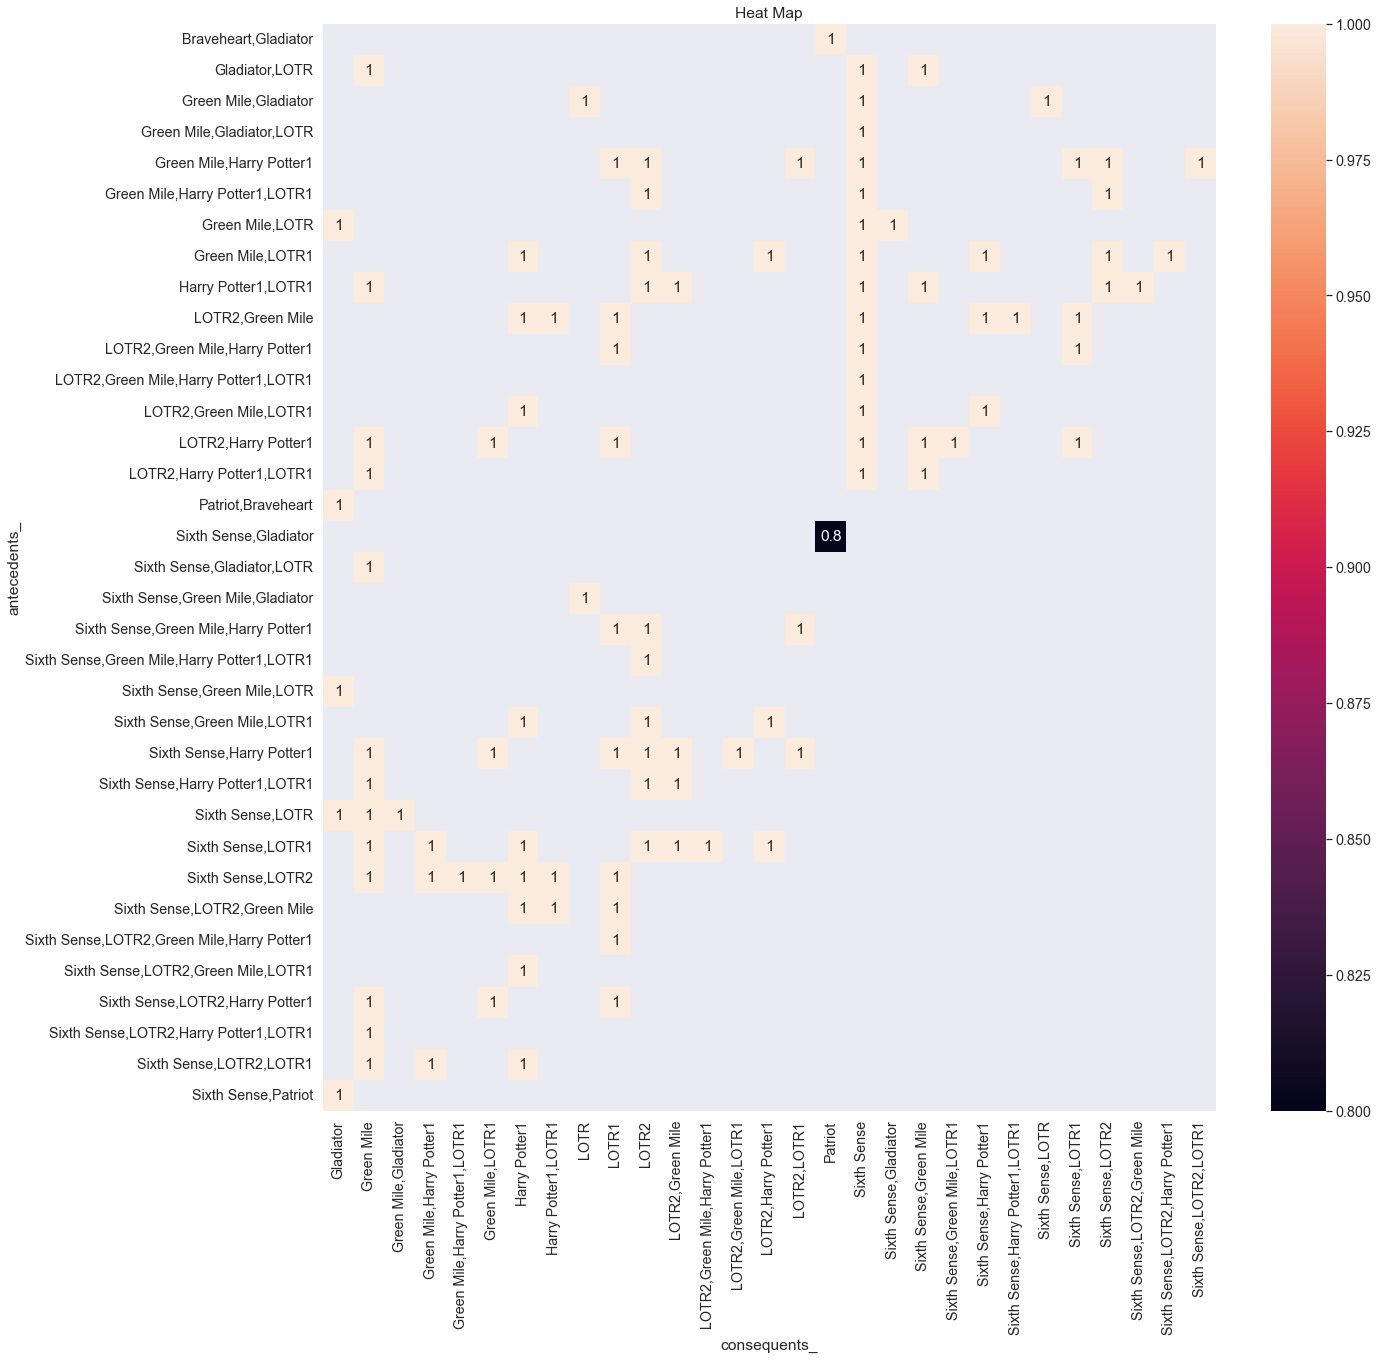

In [53]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_',values='confidence')
sns.heatmap(pivot,annot = True)
plt.title('Heat Map')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

 Gladiator has highly correlated with Sixth Sense,Patriot

#### Let's use metic lift at threshold 0.4

In [54]:
rule = association_rules(frequent_itemset ,metric = 'lift',min_threshold=0.8)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.800
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800


with lift of 80% we got 245 association combinations of books

In [55]:
rule['lhs items'] = rule['antecedents'].apply(lambda x:len(x))
rule[rule['lhs items']>1].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
155,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
178,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
197,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
195,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
194,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
192,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
183,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
181,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
180,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2
168,"(Green Mile, LOTR1)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

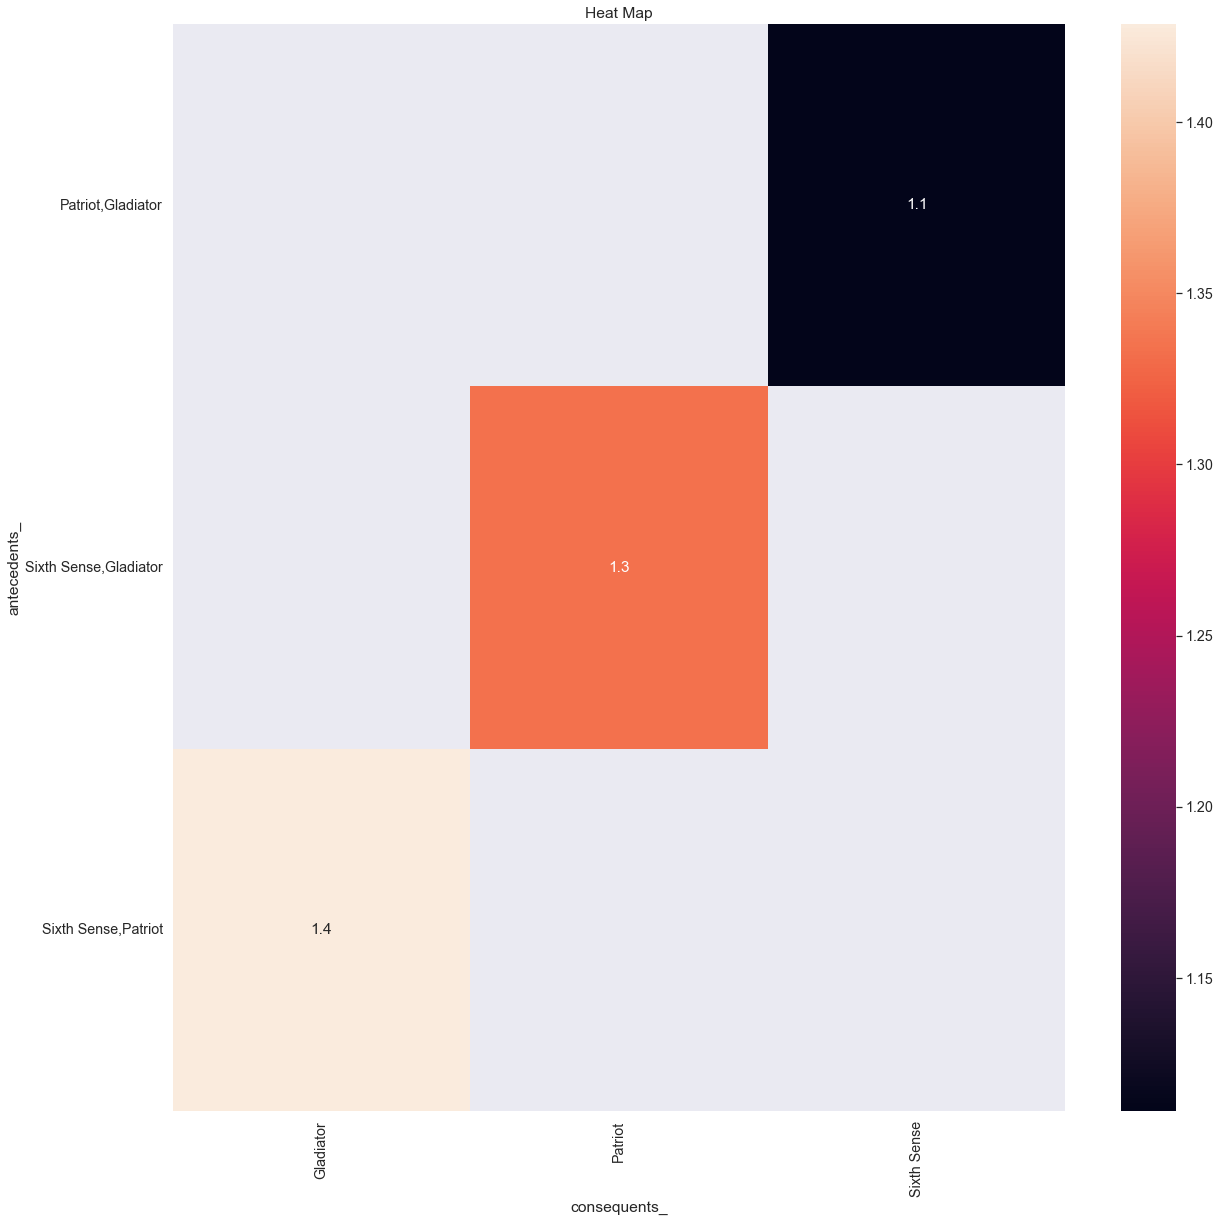

In [35]:
rule['antecedents_'] = rule['antecedents'].apply(lambda a: ','.join(list(a)))
rule['consequents_'] = rule['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_',values='lift')
sns.heatmap(pivot,annot = True)
plt.title('Heat Map')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

### Aprori Algorithm
at min_support =0.2

In [56]:
frequent_itemset1 = apriori(movies1, min_support = 0.2,use_colnames=True)
frequent_itemset1

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [57]:
rules1 = association_rules(frequent_itemset1 ,metric = 'confidence',min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


with confidence of 80% we got 7 association combinations of books

In [58]:
rules1 = association_rules(frequent_itemset1 ,metric = 'lift',min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


with lift of 80% we got 16 association combinations of books

#### Aprori Algorithm
at min_support =0.3

In [61]:
frequent_itemset2 = apriori(movies1, min_support = 0.3,use_colnames=True)
frequent_itemset2

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


In [69]:
rules2 = association_rules(frequent_itemset2 ,metric = 'confidence',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


with support 30% and confidence 90%, the associated movies are Patriot and Gladiator.